In [59]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

## Multiple Linear Regression

In [4]:
df =pd.read_csv("../Dataset/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.fillna(0, inplace=True)

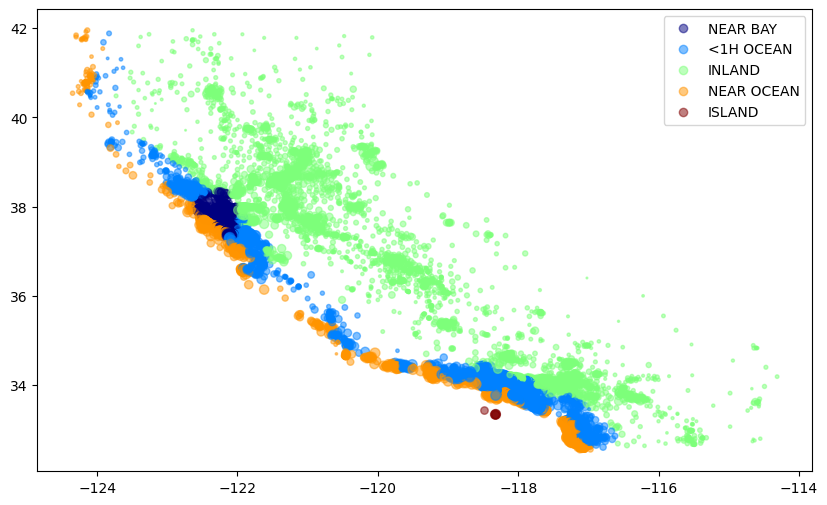

In [8]:
fig , axes = plt.subplots(figsize=(10,6))

proxmity , index = df.ocean_proximity.factorize()

scatter = axes.scatter(df.longitude, df.latitude, c=proxmity, alpha=0.5, s=df.median_house_value/10000, cmap="jet")

element, _ = scatter.legend_elements()

plt.legend(element, index)

plt.show()

In [9]:
reg = LinearRegression()

In [21]:
data_x = df.drop(columns=["median_house_value", "ocean_proximity"])
data_y = df["median_house_value"].to_numpy().reshape(-1,1)

In [22]:
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.3)

In [23]:
reg.fit(train_x, train_y)

LinearRegression()

In [24]:
reg.coef_

array([[-4.28202146e+04, -4.25964882e+04,  1.17621381e+03,
        -5.28220765e+00,  5.44935265e+01, -3.79355619e+01,
         9.69140993e+01,  3.91491856e+04]])

In [30]:
df2 = pd.DataFrame({
    "Features" : train_x.columns,
    "Importance": reg.coef_[0]
})

df2

,Features,Importance
0,longitude,-42820.214636
1,latitude,-42596.488180
2,housing_median_age,1176.213814
3,total_rooms,-5.282208
4,total_bedrooms,54.493526
5,population,-37.935562
6,households,96.914099
7,median_income,39149.185625


In [26]:
test_result1 = test_x.copy()

In [27]:
test_result1["predicted_price"] = reg.predict(test_x)

test_result1["original_price"] = test_y

In [28]:
test_result1.predicted_price.std()

89867.349853353

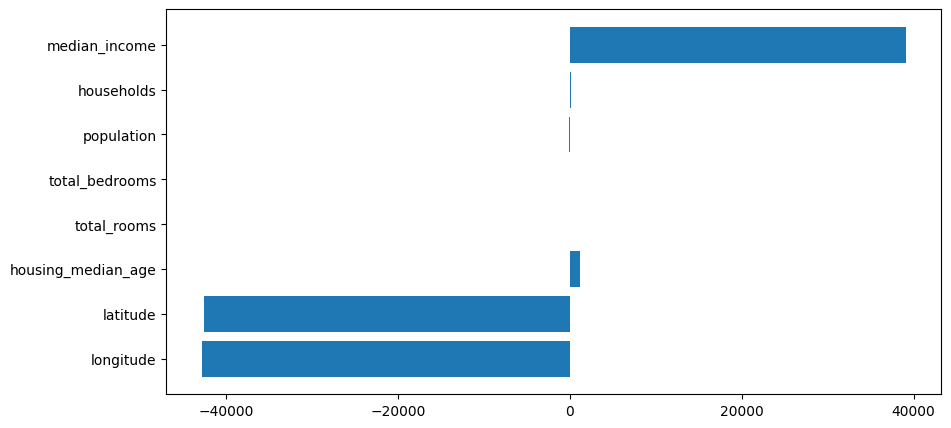

In [49]:
plt.figure(figsize=(10,5))
plt.barh(y=df2.Features, width=df2.Importance)
# plt.xticks(rotation=90)
plt.show()

In [51]:
mse = mean_squared_error(test_result1.original_price, test_result1.predicted_price)
mae = mean_absolute_error(test_result1.original_price, test_result1.predicted_price)

print("mse: ", mse)
print("mae: ", mae)
print("rmse: ", sqrt(mse))

mse:  4799538028.931215
mae:  50976.626140226384
rmse:  69278.69823352064


In [52]:
n1 = reg.predict(test_x)

In [53]:
n1

array([[178235.11222508],
       [177922.4327569 ],
       [327429.56803235],
       ...,
       [314675.59303338],
       [261976.28074965],
       [338167.30180369]])

In [55]:
mean_absolute_error(test_y, n1)

50976.626140226384

In [56]:
r2_score(test_y, n1)

0.6342727159201214

In [57]:
mean_squared_error(test_y, n1)

4799538028.931215